## Этап 1. Открываю данные и получаю общую информацию о датасете

### Импортирую библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
try:
    df = pd.read_csv('gold_recovery_full_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_train = pd.read_csv('gold_recovery_train_new.csv')
except:
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [3]:
df.shape, df_test.shape, df_train.shape

((19439, 87), (5290, 53), (14149, 87))

In [4]:
#исходная выборка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
df.head(20)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [6]:
#обучающая выборка
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
#тестовая выборка
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Обучающая выборка состоит из 87 признаков, тестовая - из 53. Соотношение обучающей выборки к тестовой 73:27.

### Проверяю, что эффективность обогащения рассчитана правильно. Вычисляю её на обучающей выборке для признака rougher.output.recovery. Нахожу MAE между своими расчётами и значением признака.

In [8]:
#доля золота в концентрации после флотации/очистки
c = df_train['rougher.output.concentrate_au']

In [9]:
#доля золота в отвальных хвостах после флотации/очистки
t = df_train['rougher.output.tail_au']

In [10]:
#доля золота в сырье/концентрате до флотации/очистки
f = df_train['rougher.input.feed_au']

In [11]:
#формула
recovery = (c * (f - t))/(f * (c - t)) * 100

In [12]:
#рассчитываем среднюю абсолюную ошибку
mae = mean_absolute_error(df_train['rougher.output.recovery'], recovery)
mae.round()

0.0

Эффективность обогащения на тестовой выборке рассчитана верно, показатель MAE между имеющимися данными и рассчитанными по формуле значениями практически равен 0.

### Проанализирую признаки, недоступные в тестовой выборке. Определю, что это за параметры и к какому типу относятся.

In [13]:
#список столбцов, которых нет в тестовой выборке
no_test_columns = df_train.columns.symmetric_difference(df_test.columns)
no_test_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

In [14]:
print('Количество отсутствующих параметров:', len(no_test_columns))

Количество отсутствующих параметров: 34


- Большинство данных, отсутствующих в тестовой выборке относятся к output, то есть к параметрам продукта. Например, такие признаки как final.output.concentrate_au, final.output.tail_au показывают долю золота в финальном концентрате. Их отсутствие в тестовой выборке объясняется предотвращением утечки целевого признака.
- Некоторые данные с типом параметра output/calculation отсутствуют, так как замеряются или рассчитываются значительно позже.

### Оцениваю количество пропусков

In [15]:
def isna(data):
    data_isna = data.isna().sum()
    data_isna_percentage = ((data_isna / len(data)) * 100).round(2)
    data_isna_df = pd.DataFrame({
    'Количество пропусков': data_isna,
    'Процент пропусков': data_isna_percentage
}) 
    return data_isna_df[(data_isna_df['Количество пропусков'] > 0)].sort_values(
        by='Количество пропусков', ascending=False)

In [16]:
df_isna = isna(df)
df_isna.head(30)

,Количество пропусков,Процент пропусков
secondary_cleaner.output.tail_sol,1748,8.99
rougher.input.floatbank11_xanthate,453,2.33
rougher.state.floatbank10_e_air,436,2.24
primary_cleaner.output.concentrate_sol,370,1.90
secondary_cleaner.state.floatbank2_a_air,220,1.13
final.output.concentrate_sol,211,1.09
rougher.input.feed_size,145,0.75
primary_cleaner.output.concentrate_pb,116,0.60
primary_cleaner.input.xanthate,104,0.54
final.output.tail_pb,101,0.52


In [17]:
df_train_isna = isna(df_train)
df_train_isna.head(20)

,Количество пропусков,Процент пропусков
secondary_cleaner.output.tail_sol,1605,11.34
rougher.state.floatbank10_e_air,436,3.08
rougher.input.floatbank11_xanthate,428,3.02
primary_cleaner.output.concentrate_sol,286,2.02
secondary_cleaner.state.floatbank2_a_air,217,1.53
final.output.concentrate_sol,211,1.49
rougher.input.feed_size,144,1.02
final.output.tail_pb,100,0.71
rougher.input.feed_pb,100,0.71
primary_cleaner.input.xanthate,100,0.71


In [18]:
df_test_isna = isna(df_test)
df_test_isna.head(20)

,Количество пропусков,Процент пропусков
rougher.input.floatbank11_xanthate,25,0.47
rougher.input.feed_sol,21,0.40
secondary_cleaner.state.floatbank3_a_air,9,0.17
rougher.input.floatbank11_sulfate,8,0.15
primary_cleaner.input.depressant,5,0.09
rougher.input.floatbank10_sulfate,5,0.09
primary_cleaner.input.sulfate,4,0.08
primary_cleaner.input.xanthate,4,0.08
rougher.input.feed_rate,3,0.06
secondary_cleaner.state.floatbank2_a_air,3,0.06


### Заполню пропуски соседними по времени параметрами для всех выборок

In [19]:
#функция заполнения пропусков
def fill_nan(data):
    data = data.ffill(axis=0)
    return data

In [20]:
df = fill_nan(df)

In [21]:
df_train = fill_nan(df_train)

In [22]:
df_test = fill_nan(df_test)

### Проверю датафреймы на наличие дубликатов

In [23]:
df.duplicated().sum()

0

In [24]:
df_train.duplicated().sum()

0

In [25]:
df_test.duplicated().sum()

0

### ВЫВОД:

Доступны 3 датафрейма: исходные данные, обучающая выборка, тестовая выборка. 
- Соотношение данных в тестовой и обучающей выборке находится в корректной пропорции (27:73);
- Тестовая выборка содержит на 34 признака меньше, чем обучающая, чтобы не возникала утечка целевого признака;
- Обнаруженные пропуски в выборках были заполнены соседними параметрами, так как согласно исходным данным данные индексируются датой и временем получения информации и соседние по времени параметры часто похожи;
- Явных дубликатов не обнаружено.

## Этап 2. Анализ данных

### Посмотрю, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [26]:
def concentrate(data, name, name2):
    data_stage = data.filter(regex=name)
    data_stage.columns = ['финальные', 'первичная очистка', 'сырье', 'флотация']
    data_stage = data_stage[['сырье', 'флотация', 'первичная очистка', 'финальные']]
    au_boxplot = sns.boxplot(data=data_stage)
    au_boxplot.set_title(f'Концентрация {name2} на разных стадиях')
    au_boxplot.set_xlabel('Этап обработки')
    au_boxplot.set_ylabel('Значения')
    plt.show()
    print(data_stage.describe())

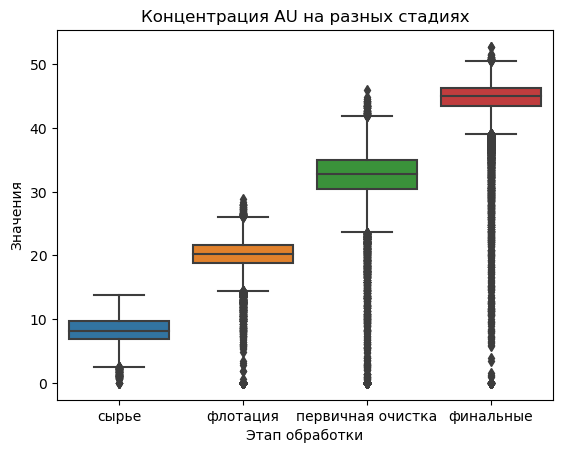

              сырье      флотация  первичная очистка     финальные
count  19439.000000  19439.000000       19439.000000  19439.000000
mean       8.266097     19.772000          32.119400     44.076513
std        1.955092      3.753600           5.627611      5.129784
min        0.010000      0.000000           0.000000      0.000000
25%        6.854384     18.802523          30.463140     43.402215
50%        8.125839     20.280214          32.841295     45.011244
75%        9.769917     21.717843          35.048006     46.275313
max       13.731330     28.824507          45.933934     52.756638


In [27]:
concentrate(df, 'concentrate_au|feed_au', 'AU')

Средние и медианные значения AU возрастают поэтапно от сырья до финального концентрата.

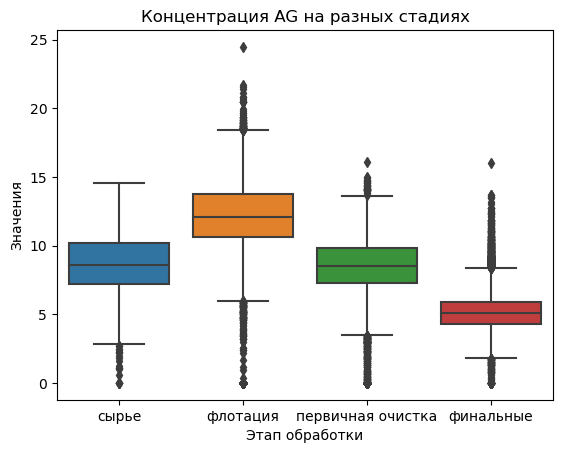

              сырье      флотация  первичная очистка     финальные
count  19439.000000  19439.000000       19439.000000  19439.000000
mean       8.794927     11.994759           8.442408      5.168387
std        1.936847      2.733862           2.054465      1.372362
min        0.010000      0.000000           0.000000      0.000000
25%        7.237967     10.628337           7.263288      4.251000
50%        8.593574     12.098115           8.507298      5.066039
75%       10.213771     13.736996           9.809001      5.895401
max       14.596026     24.480271          16.081632     16.001945


In [28]:
concentrate(df, 'concentrate_ag|feed_ag', 'AG')

Средние и медианные значения AG растут от сырья до этапа флотации, затем снижаются поэтапно от флотации до финального концентрата.

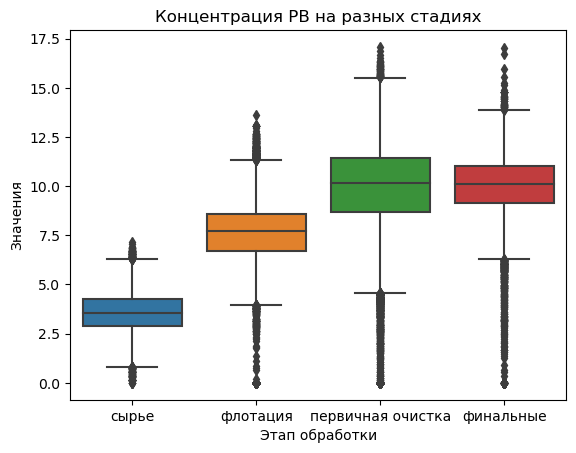

              сырье      флотация  первичная очистка     финальные
count  19439.000000  19439.000000       19439.000000  19439.000000
mean       3.585096      7.606272           9.810317      9.978821
std        1.062972      1.796757           2.572253      1.669228
min        0.010000      0.000000           0.000000      0.000000
25%        2.872178      6.725987           8.676500      9.137225
50%        3.528235      7.742580          10.142270     10.102264
75%        4.241005      8.565199          11.416298     11.035644
max        7.142594     13.617072          17.081278     17.031899


In [29]:
concentrate(df, 'concentrate_pb|feed_pb', 'PB')

Средние и медианные значения PB повышаются поэтапно от сырья до первичной очистки. Средние и медианные значения на финальном этапе имеют незначительные различия относительно этапа первичной очистки.

### ВЫВОД:

- Концентрация AU последовательно повышается на каждом этапе: наименьшее среднее значение характерно для сырья, наибольшее - для финальных характеристик;
- Концентрация AG растет от сырья к этапу флотации, затем снижается на каждом этапе: наименьшее среднее значение соответствует финальному этапу, наибольшее флотации;
- Концентрация PB имеет наименьшее среднее на этапе сырья, разница между финальным этапом и первичной очисткой незначительна.

### Сравню распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

In [30]:
#функция построения графиков боксплот для обучающей и тестовой выборки
def feed_size(data_train, data_test):
    feed_size_data_train = data_train.filter(regex='feed_size')
    feed_size_data_test = data_test.filter(regex='feed_size')
    feed_size_data_train.columns = ['первичная очистка', 'флотация']
    feed_size_data_test.columns = ['первичная очистка', 'флотация']
    print('Обучающая выборка\n', feed_size_data_train.describe())
    print('Тестовая выборка\n', feed_size_data_test.describe())
    train_primary_feed_size = feed_size_data_train['первичная очистка']
    test_primary_feed_size = feed_size_data_test['первичная очистка']
    feed_size_boxplot_1 = sns.boxplot(data=[train_primary_feed_size, test_primary_feed_size])

    feed_size_boxplot_1.set_title('Cравнение выборок по размерам гранул сырья, первичная очистка')
    feed_size_boxplot_1.set_xlabel('Стадия')
    feed_size_boxplot_1.set_ylabel('Размер гранул')
    feed_size_boxplot_1.set_ylim([4, 12])
    plt.show()
    train_rough_feed_size = feed_size_data_train['флотация']
    test_rough_feed_size = feed_size_data_test['флотация']

    feed_size_boxplot_2 = sns.boxplot(data=[train_rough_feed_size, test_rough_feed_size])
    feed_size_boxplot_2.set_title('Cравнение выборок по размерам гранул сырья, флотация')
    feed_size_boxplot_2.set_xlabel('Стадия')
    feed_size_boxplot_2.set_ylabel('Размер гранул')
    feed_size_boxplot_2.set_ylim([15, 150])
    plt.show()


Обучающая выборка
        первичная очистка      флотация
count       14149.000000  14149.000000
mean            7.322310     60.239856
std             0.614062     23.005310
min             1.080000      9.659576
25%             6.960000     48.966751
50%             7.290000     55.269784
75%             7.700000     66.007526
max            10.470000    484.967466
Тестовая выборка
        первичная очистка     флотация
count        5290.000000  5290.000000
mean            7.266339    55.952754
std             0.610219    19.080334
min             5.650000     0.046369
25%             6.890000    43.906504
50%             7.250000    50.846843
75%             7.600000    62.451165
max            15.500000   392.494040


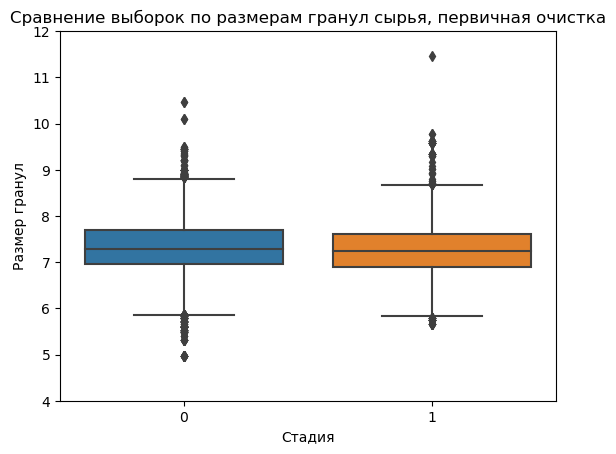

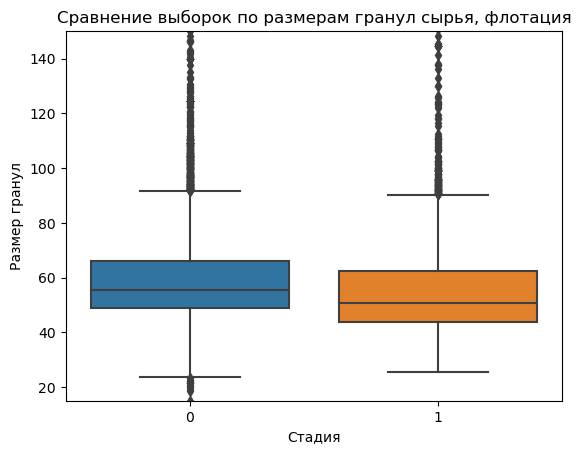

In [31]:
feed_size(df_train, df_test)

Размеры "ящиков" и медиан достаточно похожи для значений как обучающей, так и тестовой выборки.

In [32]:
# функция для построения гистограммы для обучающей и тестовой и выборок
def hist_feed_size(data_train, data_test):
    feed_size_data_train = data_train.filter(regex='feed_size')
    feed_size_data_test = data_test.filter(regex='feed_size')
    feed_size_data_train.columns = ['первичная очистка', 'флотация']
    feed_size_data_test.columns = ['первичная очистка', 'флотация']
    train_primary_feed_size = feed_size_data_train['первичная очистка']
    test_primary_feed_size = feed_size_data_test['первичная очистка']
    train_rough_feed_size = feed_size_data_train['флотация']
    test_rough_feed_size = feed_size_data_test['флотация']
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 8))

    axs[0, 0].hist(train_primary_feed_size, color='blue', edgecolor='black', range=(4, 10), bins=20)
    axs[0, 0].grid()
    axs[0, 0].set_title('Распределение размеров гранул сырья 1ый этап очистки, обучающая выборка')
    axs[0, 0].tick_params(axis='x', labelsize=6)

    axs[1, 0].hist(test_primary_feed_size, color='green', edgecolor='black', range=(4, 10), bins=20)
    axs[1, 0].grid()
    axs[1, 0].set_title('Распределение размеров гранул сырья 1ый этап очистки, тестовая выборка')
    axs[1, 0].tick_params(axis='x', labelsize=6)
    
    axs[0, 1].hist(train_rough_feed_size, color='blue', edgecolor='black', range=(0,200), bins=20)
    axs[0, 1].grid()
    axs[0, 1].set_title('Распределение размеров гранул сырья флотация, обучающая выборка')
    axs[0, 1].tick_params(axis='x', labelsize=6)
    
    axs[1, 1].hist(train_rough_feed_size, color='green', edgecolor='black', range=(0,200), bins=20)
    axs[1, 1].grid()
    axs[1, 1].set_title('Распределение размеров гранул сырья флотация, тестовая выборка')
    axs[1, 1].tick_params(axis='x', labelsize=6)
    
    plt.tight_layout()
    plt.show()

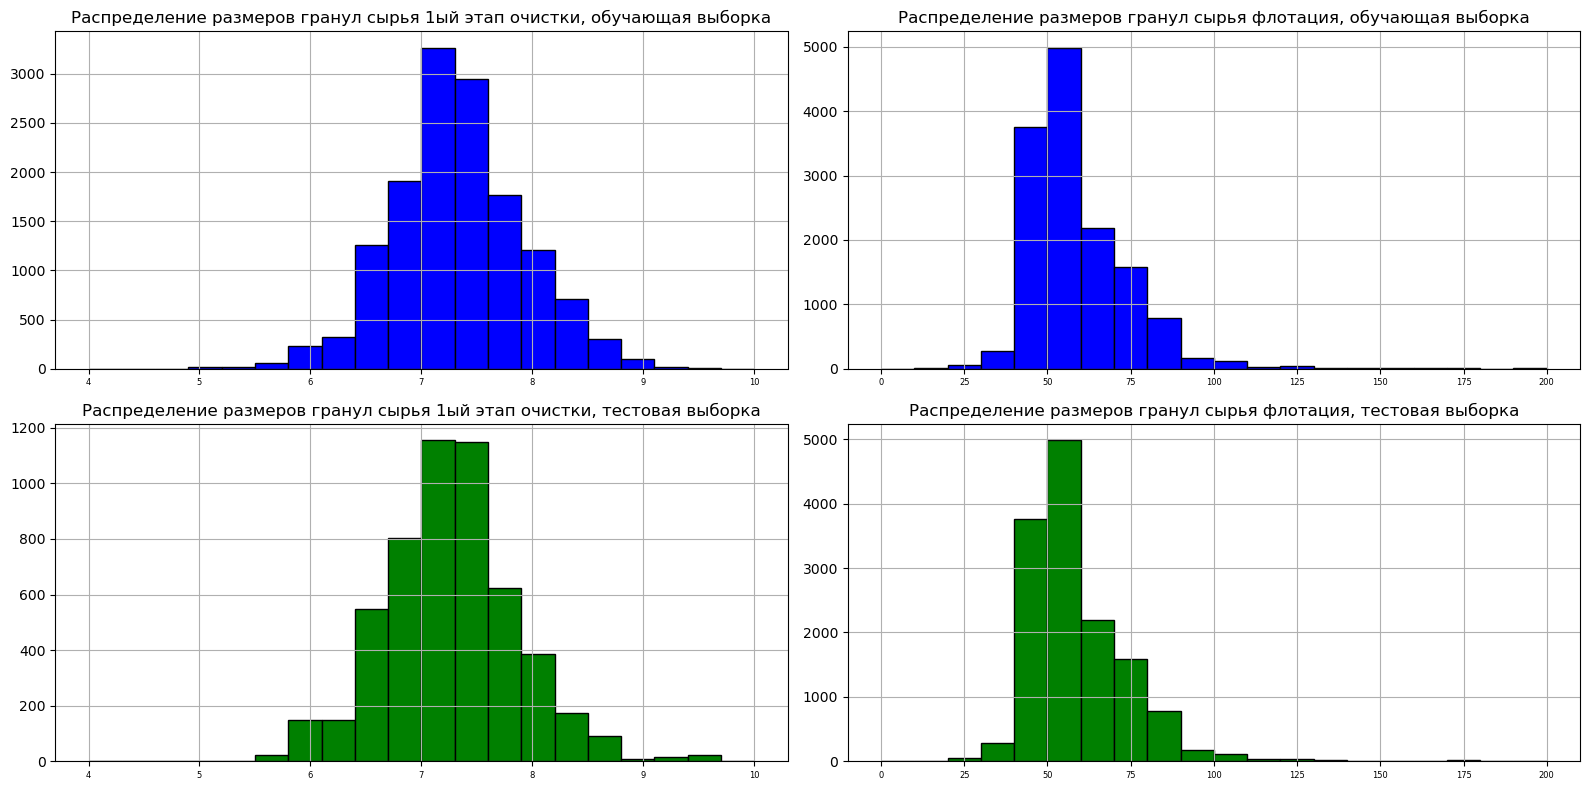

In [33]:
hist_feed_size(df_train, df_test)

Визуально распределения достаточно похожи. Недостатком данного графика является произвольный выбор корзин.

Рассмотрим как соотносятся распределения через QQ-plot.

In [34]:
#функция для построения графика QQ-plot
def qqplot(data_train, data_test):
    feed_size_data_train = data_train.filter(regex='feed_size')
    feed_size_data_test = data_test.filter(regex='feed_size')
    feed_size_data_train.columns = ['первичная очистка', 'флотация']
    feed_size_data_test.columns = ['первичная очистка', 'флотация']
    train_primary_feed_size = feed_size_data_train['первичная очистка']
    test_primary_feed_size = feed_size_data_test['первичная очистка']
    train_rough_feed_size = feed_size_data_train['флотация']
    test_rough_feed_size = feed_size_data_test['флотация']
    
    number_1 = train_primary_feed_size.values
    number_2 = test_primary_feed_size.values
    df_qq_1 = pd.DataFrame()
    df_qq_1['q_train_pr'] = np.percentile(number_1, range(100))
    df_qq_1['q_test_pr'] = np.percentile(number_2, range(100))
    plt.figure(figsize=(6,6))
    plt.scatter(data=df_qq_1, x='q_train_pr', y='q_test_pr', label='Реальное совпадение')
    sns.lineplot(x='q_train_pr', y='q_train_pr', data=df_qq_1, color='r', label='Идеальное совпадение')
    plt.xlabel('Обучающая выборка')
    plt.ylabel('Тестовая выборка')
    plt.title('QQ plot для этапа первичной очистки')
    plt.grid()
    plt.show()
    
    number_3 = train_rough_feed_size.values
    number_4 = test_rough_feed_size.values
    df_qq_2 = pd.DataFrame()
    df_qq_2['q_train_pr'] = np.percentile(number_3, range(100))
    df_qq_2['q_test_pr'] = np.percentile(number_4, range(100))
    plt.figure(figsize=(6,6))
    plt.scatter(data=df_qq_2, x='q_train_pr', y='q_test_pr', label='Реальное совпадение')
    sns.lineplot(x='q_train_pr', y='q_train_pr', data=df_qq_2, color='r', label='Идеальное совпадение')
    plt.xlabel('Обучающая выборка')
    plt.ylabel('Тестовая выборка')
    plt.title('QQ plot для этапа флотации')
    plt.grid()
    plt.show()

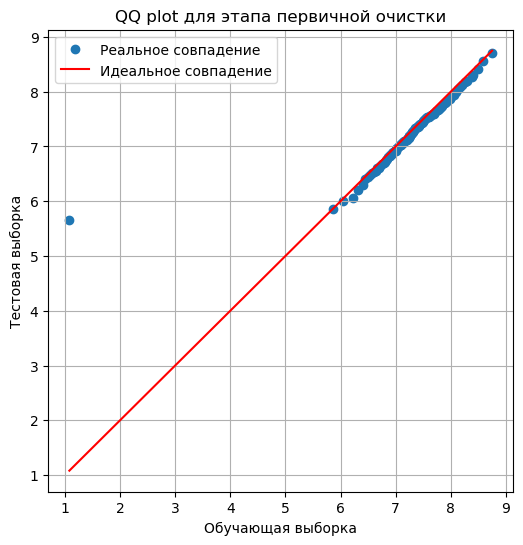

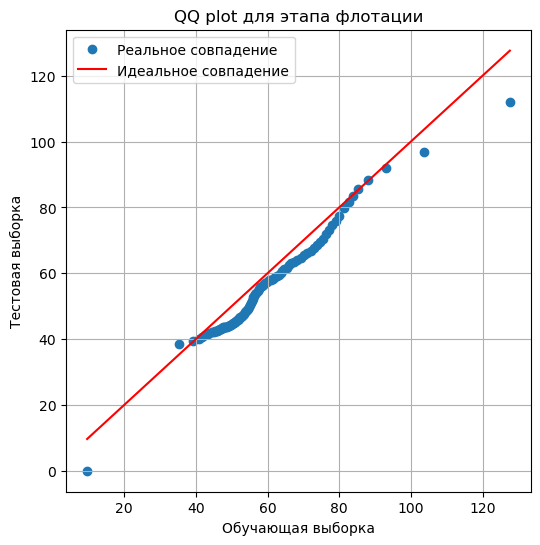

In [35]:
qqplot(df_train, df_test)

Построим графики для оценки плотности распределения.

In [36]:
#функция для построения графика оценки плотности распределния
def kdeplot(data_train, data_test):
    feed_size_data_train = data_train.filter(regex='feed_size')
    feed_size_data_test = data_test.filter(regex='feed_size')
    feed_size_data_train.columns = ['первичная очистка', 'флотация']
    feed_size_data_test.columns = ['первичная очистка', 'флотация']
    train_primary_feed_size = feed_size_data_train['первичная очистка']
    test_primary_feed_size = feed_size_data_test['первичная очистка']
    train_rough_feed_size = feed_size_data_train['флотация']
    test_rough_feed_size = feed_size_data_test['флотация']
    sns.kdeplot(data=train_primary_feed_size, label='Обучающая выборка')
    sns.kdeplot(data=test_primary_feed_size, label='Тестовая выборка')
    plt.title('KDE plot для этапа первичной очистки')
    plt.legend()
    plt.grid()
    plt.show()
    
    sns.kdeplot(data=train_rough_feed_size, label='Обучающая выборка')
    sns.kdeplot(data=test_rough_feed_size, label='Тестовая выборка')
    plt.title('KDE plot для этапа флотации')
    plt.legend()
    plt.grid()
    plt.show()

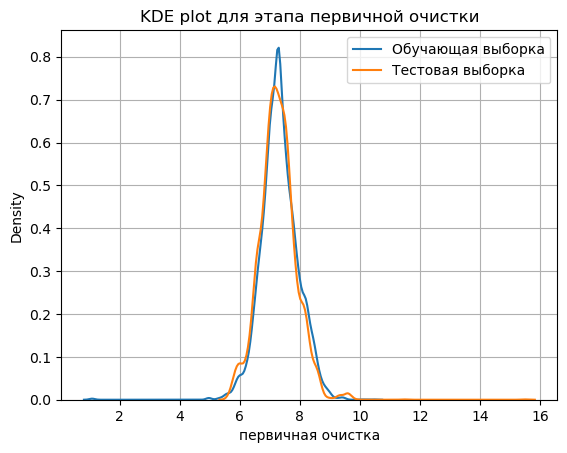

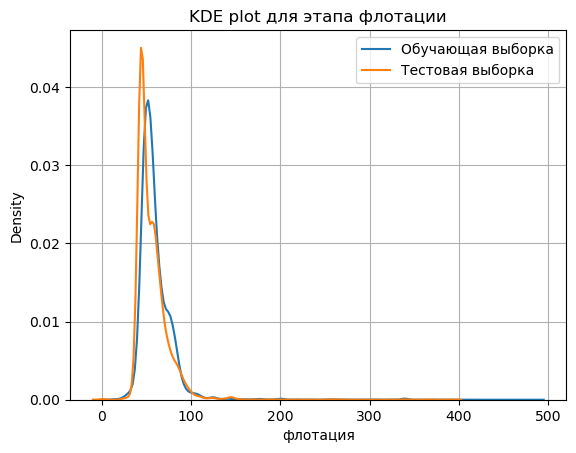

In [37]:
kdeplot(df_train, df_test)

### ВЫВОД

- Распределения размеров гранул сырья на обучающей и тестовой выборках на стадии первичной обработки имеют мало различий, медиана и среднее выборок различаются минимально;
- Распределения размеров гранул сырья на обучающей и тестовой выборках на стадии флотации имеют более выраженные различия, но в целом распределение имеет схожую форму.


### Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [38]:
#данные для сырья
df_rougher_input = df.filter(regex='rougher.input.feed')
df_rougher_input = df_rougher_input.drop(columns=
                                             ['rougher.input.feed_rate', 'rougher.input.feed_size'])
df['rougher.input.feed_sum'] = df_rougher_input.sum(axis=1)

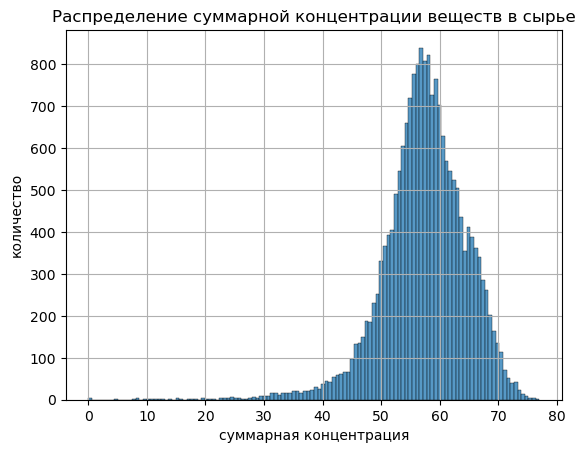

In [39]:
sns.histplot(data=df, x='rougher.input.feed_sum')
plt.title('Распределение суммарной концентрации веществ в сырье')
plt.xlabel('суммарная концентрация')
plt.ylabel('количество')
plt.grid()
plt.show()

In [40]:
#данные для чернового концентрата
df_rougher_output = df.filter(regex='rougher.output.concentrate')
df['rougher.output.concentrate_sum'] = df_rougher_output.sum(axis=1)

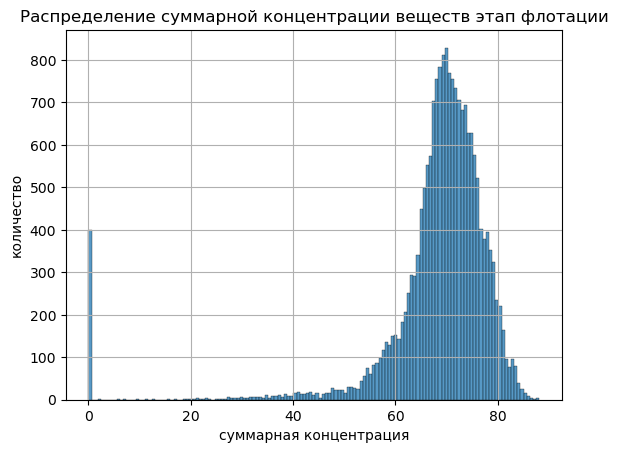

In [41]:
sns.histplot(data=df, x='rougher.output.concentrate_sum')
plt.title('Распределение суммарной концентрации веществ этап флотации')
plt.xlabel('суммарная концентрация')
plt.ylabel('количество')
plt.grid()
plt.show()

In [42]:
#данные для концентрата после первого этапа очистки
df_primary_output = df.filter(regex='primary_cleaner.output.concentrate')
df['primary_cleaner.output.concentrate_sum'] = df_primary_output.sum(axis=1)

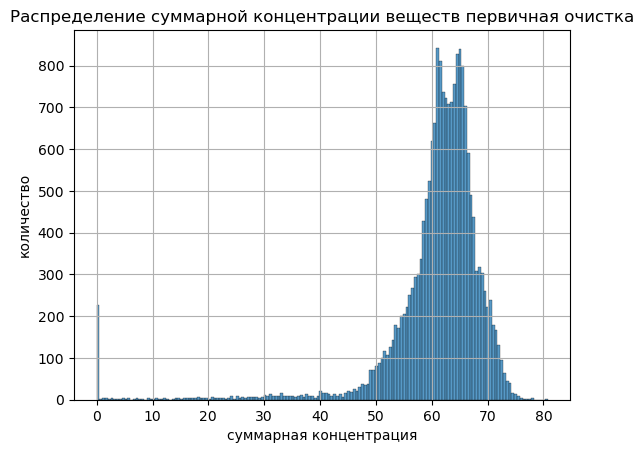

In [43]:
sns.histplot(data=df, x='primary_cleaner.output.concentrate_sum')
plt.title('Распределение суммарной концентрации веществ первичная очистка')
plt.xlabel('суммарная концентрация')
plt.ylabel('количество')
plt.grid()
plt.show()

In [44]:
#данные для финального концентрата
df_final_output = df.filter(regex='final.output.concentrate')
df['final.output.concentrate_sum'] = df_final_output.sum(axis=1)

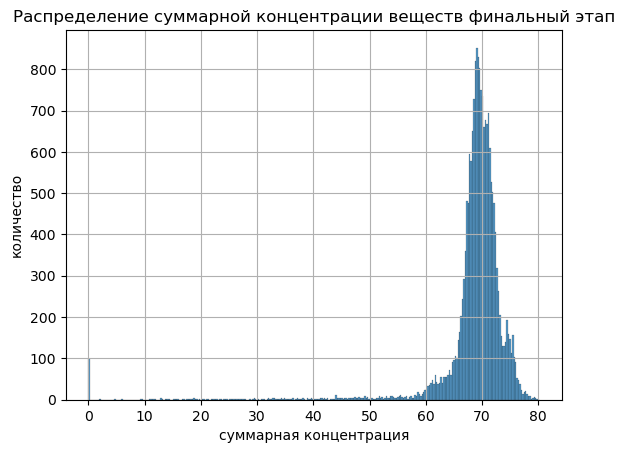

In [45]:
sns.histplot(data=df, x='final.output.concentrate_sum')
plt.title('Распределение суммарной концентрации веществ финальный этап')
plt.xlabel('суммарная концентрация')
plt.ylabel('количество')
plt.grid()
plt.show()

In [46]:
print('Аномалии для распределения сырья:', 
      df.loc[df['rougher.input.feed_sum'] == 0, 'rougher.input.feed_sum'].count())
print('Аномалии для распределения флотации:', 
      df.loc[df['rougher.output.concentrate_sum'] == 0, 'rougher.output.concentrate_sum'].count())
print('Аномалии для распределения первичной очистки:', 
      df.loc[df['primary_cleaner.output.concentrate_sum'] == 0, 
             'primary_cleaner.output.concentrate_sum'].count())
print('Аномалии для распределения финального концентрата:',
      df.loc[df['final.output.concentrate_sum'] == 0, 'final.output.concentrate_sum'].count())

Аномалии для распределения сырья: 0
Аномалии для распределения флотации: 394
Аномалии для распределения первичной очистки: 108
Аномалии для распределения финального концентрата: 98


### Исключаю аномальные значения из исходных данных

In [47]:
#исключение из исходных данных аномальных значений
for col in ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 
            'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']:
    df = df[df[col] > 0]

In [48]:
df = df.set_index('date')

In [49]:
df_train = df_train.set_index('date')

In [50]:
#обучающие данные без аномалий
df_train = df_train.loc[df_train.index.isin(df.index)]

### ВЫВОД

- В суммарной концентрации сырья на этапах флотации, первичной очистки, финального концентрата обнаружены аномалии (значения равны 0).
- Из исходных данных и обучающей выборки исключены значения аномалии.

## Этап 3. Построение модели

### Функция для вычисления итоговой sMAPE

In [51]:
#функция для smape
def smape(y, y_pred):
    abs1 = abs(y - y_pred)
    abs2 = abs(y) + abs(y_pred)
    return 1/len(y) * ((abs1 * 2 / abs2) * 100).sum()

In [52]:
#функция для итогового smape
def final_smape(smape1, smape2):
    return smape1 * 0.25 + smape2 * 0.75

### Обучаю разные модели и оцениваю их качество кросс-валидацией. Выбираю лучшую модель и проверяю её на тестовой выборке

В качестве признаков берем все признаки из тестовой выборки, кроме столбца date. Рассматриваем отдельно два целевых признака: rougher.output.recovery и final.output.recovery.

In [53]:
df_test = df_test.set_index('date')

In [54]:
df_test = df_test.merge(df[['rougher.output.recovery', 'final.output.recovery']],
                       how='inner', left_index=True, right_index=True)

In [55]:
#определяем признаки, целевой признак
features_train = df_train[df_test.columns].drop(
    ['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_1 = df_train['rougher.output.recovery']
target_train_2 = df_train['final.output.recovery']
target_test_1 = df_test['rougher.output.recovery']
target_test_2 = df_test['final.output.recovery']

In [56]:
features_train.shape, features_test.shape

((13725, 52), (5123, 52))

In [57]:
#задаем метрику качества модели
smape_scorer = make_scorer(smape, greater_is_better=False)

#### Линейная регрессия.

In [58]:
model_1 = LinearRegression()
scores_1 = cross_val_score(model_1, features_train, target_train_1, 
                           cv=5, scoring=smape_scorer)
print('Результат модели:', abs(scores_1.mean()))

Результат модели: 7.265696047565976


In [59]:
model_2 = LinearRegression()
scores_2 = cross_val_score(model_2, features_train, target_train_2,
                          cv=5, scoring=smape_scorer)
print('Результат модели:', abs(scores_2.mean()))

Результат модели: 10.95053250099325


#### Дерево решений. С помощью GridSearchCV подберу лучшие гиперпараметры для Decision Tree

In [60]:
model_3 = DecisionTreeRegressor(random_state=12345)
parametrs_1 = ({'max_depth': range(2,30,2),
             'min_samples_split': range(5,15,3),
             'min_samples_leaf': range(5,15,3)})
grid_model_3 = GridSearchCV(model_3, parametrs_1, scoring=smape_scorer)
grid_model_3.fit(features_train, target_train_1)
print('Лучшие гиперпараметры:', grid_model_3.best_params_)

Лучшие гиперпараметры: {'max_depth': 4, 'min_samples_leaf': 11, 'min_samples_split': 5}


In [61]:
print('Результат модели:', abs(grid_model_3.best_score_))

Результат модели: 7.3006074059538495


In [62]:
model_4 = DecisionTreeRegressor(random_state=12345)
parametrs_2 = ({'max_depth': range(2,30,2),
             'min_samples_split': range(5,15,3),
             'min_samples_leaf': range(5,15,3)})
grid_model_4 = GridSearchCV(model_4, parametrs_2, scoring=smape_scorer)
grid_model_4.fit(features_train, target_train_2)
print('Лучшие гиперпараметры:', grid_model_4.best_params_)

Лучшие гиперпараметры: {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [63]:
print('Результат модели:', abs(grid_model_4.best_score_))

Результат модели: 9.448847712639406


#### Random Forest. С помощью GridSearchCV подберу лучшие гиперпараметры для Random Forest

In [64]:
model_5 = RandomForestRegressor(random_state=12345)
parametrs_3 = ({'max_depth': range(2,20,2),
              'n_estimators': range(5,100,10)})
grid_model_5 = GridSearchCV(model_5, parametrs_3, scoring=smape_scorer)
grid_model_5.fit(features_train, target_train_1)
print('Лучшие гиперпараметры:', grid_model_5.best_params_)

Лучшие гиперпараметры: {'max_depth': 6, 'n_estimators': 5}


In [65]:
print('Результат модели:', abs(grid_model_5.best_score_))

Результат модели: 6.627281878689024


In [66]:
model_6 = RandomForestRegressor(random_state=12345)
parametrs_4 = ({'max_depth': range(2,20,2),
              'n_estimators': range(5,100,10)})
grid_model_6 = GridSearchCV(model_6, parametrs_4, scoring=smape_scorer)
grid_model_6.fit(features_train, target_train_2)
print('Лучшие гиперпараметры:', grid_model_6.best_params_)

Лучшие гиперпараметры: {'max_depth': 4, 'n_estimators': 45}


In [67]:
print('Результат модели:', abs(grid_model_6.best_score_))

Результат модели: 9.005983773126903


In [68]:
#сравнение моделей
df_model = pd.DataFrame({'модель': ['linear regression', 'decision tree', 'random forest'],
                        'sMAPE 1': [abs(scores_1.mean()), abs(grid_model_3.best_score_)
                                    , abs(grid_model_5.best_score_)],
                         'sMAPE 2': [abs(scores_2.mean()), abs(grid_model_4.best_score_)
                                    , abs(grid_model_6.best_score_)]                         
                        })
df_model

,модель,sMAPE 1,sMAPE 2
0,linear regression,7.265696,10.950533
1,decision tree,7.300607,9.448848
2,random forest,6.627282,9.005984


#### Лучший результат показала модель Random Forest

In [69]:
best_model_1 = grid_model_5.best_estimator_

In [70]:
best_model_2 = grid_model_6.best_estimator_

### Применение лучших моделей для тестовой выборки

In [71]:
predict_test_1 = best_model_1.predict(features_test)
score_test_1 = smape(target_test_1, predict_test_1)
print('Результат модели:', score_test_1)

Результат модели: 4.58980657447828


In [72]:
predict_test_2 = best_model_2.predict(features_test)
score_test_2 = smape(target_test_2, predict_test_2)
print('Результат модели:', score_test_2)

Результат модели: 8.255504526012416


In [73]:
final_score = final_smape(score_test_1, score_test_2)
print('Итоговое sMAPE', final_score)

Итоговое sMAPE 7.339080038128882


### Проверка на адекватность

In [74]:
dummy_median_1 = DummyRegressor(strategy='median')
dummy_median_1.fit(features_train, target_train_1)
dummy_predict_1 = dummy_median_1.predict(features_test)
dummy_test_1 = smape(target_test_1, dummy_predict_1)
print('Результат dummy модели:', dummy_test_1)

Результат dummy модели: 4.809033066029801


In [75]:
dummy_median_2 = DummyRegressor(strategy='median')
dummy_median_2.fit(features_train, target_train_2)
dummy_predict_2 = dummy_median_2.predict(features_test)
dummy_test_2 = smape(target_test_2, dummy_predict_2)
print('Результат dummy модели:', dummy_test_2)

Результат dummy модели: 8.222545492433415


In [76]:
final_score_dummy = final_smape(dummy_test_1, dummy_test_2)
print('Итоговое sMAPE dummy модели', final_score_dummy)

Итоговое sMAPE dummy модели 7.369167385832512


## Вывод

Для исследования были предоставлены 3 датасета (исходные данные, обучающая выборка, тестовая выборка), содержащие данные по восстановлению золота из руды. 

Цель исследования - построение модели для предсказания коэффициента восстановления золота из золотосодержащей руды.

Для выполнения цели исследования были реализованы следующие задачи:
- Проведена преобработка данных: заполнены пропуски, проведена проверка на явные дубликаты;
- Проверена корректность расчетов эффективности обогащения. Значение MAE практически ровно 0, что говорит о правильности расчетов;
- Проанализированы признаки, недоступные в тестовой выборке. Их отсутствие объясняется необходимостью избежать утечку целевого признака;
- Произведен анализ концентрации металлов на различных этапах очистки. Средняя и медианная концентрация AU растет на каждом этапе от сырья до финального концентрата;
- Исследованы распределения гранул сырья на тестовой и обучающей выборках - значимых различий нет;
- Обучены и проверены модели для 2 целевых признаков (rougher.output.recovery и final.output.recovery). Наилучшие результаты показали модели Random Forest.
- Качество лучших моделей для 2 целевых признаков проверено на тестовой выборке метрикой sMAPE. Итоговое значение sMAPE 7.33%